In [1]:
import pandas as pd

In [2]:
url = 'https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_20.zip'

pd.read_csv(url)

,Dissemination ID,Original Dissemination ID,Primary Asset Class,Product ID,Action,Transaction Type,Block Trade Election Indicator,Cleared,Clearing Exception or Exemption Indicator,Day Count Convention,...,Strike Price Currency,Underlying Asset ID,Underlying Asset ID Type,Underlying Asset Name,Leg 1 - Commodity Instrument ID,Leg 2 - Commodity Instrument ID,Option Type,Option Style,Execution Venue Type,Collateralization Type
0,283469269,283469252.0,IR,InterestRate:IRSwap:FixedFloat,CANCEL,Trade,N,C,NaN,ACT/365.FIXED,...,NaN,FIXED,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN
1,283469270,283469252.0,IR,InterestRate:IRSwap:FixedFloat,CORRECT,Trade,N,C,NaN,ACT/365.FIXED,...,NaN,FIXED,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN
2,283469268,NaN,IR,InterestRate:CrossCurrency:FixedFloat,NEW,Amendment,Y,U,NaN,30/360,...,NaN,FIXED,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN
3,283469263,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,C,N,ACT/365.FIXED,...,NaN,JPY-TONA-OIS-COMPOUND,NaN,NaN,NaN,NaN,NaN,NaN,ON,NaN
4,283469262,NaN,IR,InterestRate:IRSwap:FixedFloat,NEW,Trade,N,C,NaN,ACT/365.FIXED,...,NaN,FIXED,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,283468264,283468210.0,IR,InterestRate:IRSwap:FixedFloat,CORRECT,Trade,N,U,NaN,ACT/360,...,NaN,USD-LIBOR-BBA,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN
214,283468265,283468177.0,IR,InterestRate:IRSwap:OIS,CANCEL,Trade,N,U,NaN,ACT/360,...,NaN,USD-SOFR-COMPOUND,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN
215,283468266,283468177.0,IR,InterestRate:IRSwap:OIS,CORRECT,Trade,N,U,NaN,ACT/360,...,NaN,USD-SOFR-COMPOUND,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN
216,283468267,283468210.0,IR,InterestRate:IRSwap:FixedFloat,CANCEL,Trade,N,U,NaN,ACT/360,...,NaN,USD-LIBOR-BBA,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN


In [3]:
import requests
from bs4 import BeautifulSoup

url_list = 'https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES.HTML?_=1645469103343'
list_tds = BeautifulSoup(requests.get(url_list).text).find_all("td", class_="s1", align="left")
list_urls = [x.find('a').get('href') for x in list_tds]
file_names = [x.split('/')[-1] for x in list_urls]
file_names

['CFTC_CUMULATIVE_RATES_2022_02_26.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_25.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_24.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_23.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_22.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_21.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_20.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_19.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_18.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_17.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_16.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_15.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_14.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_13.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_12.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_11.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_10.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_09.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_08.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_07.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_06.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_05.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_04.zip',
 'CFTC_CUMULATIVE_RATES_2022_02_03.zip',
 'CFTC_CUMULATIV

In [4]:
s3_url_begin = 'https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/'

In [5]:
import time
df_raw_list = []
for f_n in file_names:
    print('Downloading file: ', f_n)
    print(s3_url_begin + f_n)
    df_temp = pd.read_csv(s3_url_begin + f_n)
    df_raw_list.append(df_temp)
    time.sleep(1)
    
raw_df_master = pd.concat(df_raw_list)
raw_df_master.head(5)

https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_26.zip
https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_25.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (23,38,59,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_24.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_23.zip
https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_22.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (11,17,38,59,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_21.zip
https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_20.zip
https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_19.zip
https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_18.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_17.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (38,59,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_16.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_15.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (24,48,49,59,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_14.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (24,38,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_13.zip
https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_12.zip
https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_11.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_10.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (38,59,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_09.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (23,48,49,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_08.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (24,38,46,59,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_07.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_06.zip
https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_05.zip
https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_04.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_03.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (38,59,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_02.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (38,59,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_02_01.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (8,11,17,38,39,40,48,49,52,53,59,62,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_01_31.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_01_30.zip
https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_01_29.zip
https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_01_28.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (24,38,59,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


https://kgc0418-tdw-data-0.s3.amazonaws.com/cftc/eod/CFTC_CUMULATIVE_RATES_2022_01_27.zip


/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_1066/518598831.py:6: DtypeWarning: Columns (24,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(s3_url_begin + f_n)


,Dissemination ID,Original Dissemination ID,Primary Asset Class,Product ID,Action,Transaction Type,Block Trade Election Indicator,Cleared,Clearing Exception or Exemption Indicator,Day Count Convention,...,Strike Price Currency,Underlying Asset ID,Underlying Asset ID Type,Underlying Asset Name,Leg 1 - Commodity Instrument ID,Leg 2 - Commodity Instrument ID,Option Type,Option Style,Execution Venue Type,Collateralization Type
0,288390884,285190414.0,IR,InterestRate:IRSwap:FixedFloat,CANCEL,Trade,N,U,NaN,ACT/360,...,NaN,USD-SOFR,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN
1,288390885,285190414.0,IR,InterestRate:IRSwap:FixedFloat,CORRECT,Trade,N,U,NaN,ACT/360,...,NaN,USD-SOFR,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN
2,288390983,288060319.0,IR,InterestRate:IRSwap:FixedFloat,CANCEL,Trade,N,U,NaN,ACT/360,...,NaN,FIXED,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN
3,288390999,NaN,IR,InterestRate:Option:Swaption,NEW,Trade,Y,U,NaN,ACT/360,...,NaN,FIXED,NaN,NaN,NaN,NaN,PF,EU,OFF,NaN
4,288391078,NaN,IR,InterestRate:Option:Swaption,NEW,Novation,N,U,NaN,30/360,...,NaN,FIXED,NaN,NaN,NaN,NaN,D-,EU,OFF,NaN


In [6]:
raw_df_master

,Dissemination ID,Original Dissemination ID,Primary Asset Class,Product ID,Action,Transaction Type,Block Trade Election Indicator,Cleared,Clearing Exception or Exemption Indicator,Day Count Convention,...,Strike Price Currency,Underlying Asset ID,Underlying Asset ID Type,Underlying Asset Name,Leg 1 - Commodity Instrument ID,Leg 2 - Commodity Instrument ID,Option Type,Option Style,Execution Venue Type,Collateralization Type
0,288390884,285190414.0,IR,InterestRate:IRSwap:FixedFloat,CANCEL,Trade,N,U,NaN,ACT/360,...,NaN,USD-SOFR,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN
1,288390885,285190414.0,IR,InterestRate:IRSwap:FixedFloat,CORRECT,Trade,N,U,NaN,ACT/360,...,NaN,USD-SOFR,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN
2,288390983,288060319.0,IR,InterestRate:IRSwap:FixedFloat,CANCEL,Trade,N,U,NaN,ACT/360,...,NaN,FIXED,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN
3,288390999,NaN,IR,InterestRate:Option:Swaption,NEW,Trade,Y,U,NaN,ACT/360,...,NaN,FIXED,NaN,NaN,NaN,NaN,PF,EU,OFF,NaN
4,288391078,NaN,IR,InterestRate:Option:Swaption,NEW,Novation,N,U,NaN,30/360,...,NaN,FIXED,NaN,NaN,NaN,NaN,D-,EU,OFF,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19849,270598104,270598102.0,IR,InterestRate:IRSwap:FixedFloat,CORRECT,Trade,N,C,NaN,ACT/365.FIXED,...,NaN,FIXED,NaN,NaN,NaN,NaN,NaN,NaN,ON,NaN
19850,270598109,NaN,IR,InterestRate:IRSwap:FixedFloat,NEW,Trade,N,C,NaN,ACT/365.FIXED,...,NaN,FIXED,NaN,NaN,NaN,NaN,NaN,NaN,ON,NaN
19851,270598110,270598109.0,IR,InterestRate:IRSwap:FixedFloat,CANCEL,Trade,N,C,NaN,ACT/365.FIXED,...,NaN,FIXED,NaN,NaN,NaN,NaN,NaN,NaN,ON,NaN
19852,270598111,270598109.0,IR,InterestRate:IRSwap:FixedFloat,CORRECT,Trade,N,C,NaN,ACT/365.FIXED,...,NaN,FIXED,NaN,NaN,NaN,NaN,NaN,NaN,ON,NaN


In [7]:
raw_df_master['Product ID'].value_counts()

InterestRate:IRSwap:FixedFloat           190989
InterestRate:IRSwap:OIS                  104999
InterestRate:Option:Swaption              40528
InterestRate:FRA                          37777
InterestRate:CrossCurrency:Basis          19366
InterestRate:IRSwap:Inflation             12260
InterestRate:Exotic                        9915
InterestRate:IRSwap:Basis                  6922
InterestRate:CapFloor                      4197
InterestRate:CrossCurrency:FixedFloat      3552
InterestRate:CrossCurrency:FixedFixed      1080
InterestRate:IRSwap:FixedFixed               43
InterestRate:Option:DebtOption               18
InterestRate:Forward:Debt                    15
Name: Product ID, dtype: int64

In [8]:
raw_df_master[raw_df_master['Product ID'] =='InterestRate:IRSwap:FixedFloat']. \
    dropna(axis=1, how='all')['Notional Currency 1'].value_counts()

USD    63933
EUR    47037
MXN    18109
CLP    10542
AUD     9642
CAD     7242
CZK     4388
ZAR     3941
KRW     3767
PLN     3730
NZD     2780
CNY     2673
SEK     2015
BRL     1991
HUF     1610
THB     1512
ILS     1434
HKD      937
NOK      886
MYR      860
TWD      682
RUB      405
GBP      402
JPY      196
INR      123
SAR       43
DKK       43
SGD       25
COP       20
AED       10
CHF        9
CLF        2
Name: Notional Currency 1, dtype: int64

In [10]:
pd.set_option('display.max_columns', None)

df_fixed_float = raw_df_master[(raw_df_master['Product ID'] =='InterestRate:IRSwap:FixedFloat') & (raw_df_master['Notional Currency 1'].isin(['USD', 'EUR']))]. \
    dropna(axis=1, how='all')

df_fixed_float.head(10)

,Dissemination ID,Original Dissemination ID,Primary Asset Class,Product ID,Action,Transaction Type,Block Trade Election Indicator,Cleared,Clearing Exception or Exemption Indicator,Day Count Convention,Effective Date,Embedded Option Type,Event Timestamp,Execution Timestamp,Expiration Date,Fixed Rate 1,Fixed Rate 2,Floating Rate Reset Frequency Period 1,Floating Rate Reset Frequency Period 2,Floating Rate Reset Frequency Period Multiplier 1,Floating Rate Reset Frequency Period Multiplier 2,Leg 1 - Floating Rate Index,Leg 2 - Floating Rate Index,Non-Standardized Pricing Indicator,Notional Amount 1,Notional Amount 2,Notional Currency 1,Notional Currency 2,Other Payment Amount,Payment Frequency Period 1,Payment Frequency Period 2,Payment Frequency Period Multiplier 1,Payment Frequency Period Multiplier 2,Price 1,Price 2,Settlement Currency 1,Settlement Currency 2,Spread 1,Spread 2,Underlying Asset ID,Underlying Asset Name,Execution Venue Type
0,288390884,285190414.0,IR,InterestRate:IRSwap:FixedFloat,CANCEL,Trade,N,U,NaN,ACT/360,2022-03-31,NaN,2022-02-22T15:52:50,2022-02-22T20:52:50,2025-12-31,NaN,0.01691,1D,NaN,1.0,NaN,USD-SOFR,NaN,Y,"4,000,000","4,000,000",USD,USD,NaN,1Y,1Y,1.0,1.0,NaN,NaN,USD,USD,NaN,NaN,USD-SOFR,NaN,OFF
1,288390885,285190414.0,IR,InterestRate:IRSwap:FixedFloat,CORRECT,Trade,N,U,NaN,ACT/360,2022-03-31,NaN,2022-02-22T20:52:50,2022-02-22T20:52:50,2025-12-31,NaN,0.01691,1D,NaN,1.0,NaN,USD-SOFR,NaN,Y,"4,000,000","4,000,000",USD,USD,NaN,1Y,1Y,1.0,1.0,NaN,NaN,USD,USD,NaN,NaN,USD-SOFR,NaN,OFF
2,288390983,288060319.0,IR,InterestRate:IRSwap:FixedFloat,CANCEL,Trade,N,U,NaN,ACT/360,2019-11-12,NaN,2022-02-25T12:39:08,2022-02-25T17:39:08,2028-11-15,0.04560,NaN,NaN,1M,NaN,1.0,NaN,USD-LIBOR,Y,"4,000,000","4,000,000",USD,USD,"14,170.00917",1M,1M,1.0,1.0,NaN,NaN,USD,USD,NaN,0.0265,FIXED,NaN,OFF
7,288391669,NaN,IR,InterestRate:IRSwap:FixedFloat,NEW,Termination,N,U,Y,ACT/360,2016-07-01,NaN,2022-02-25T18:38:05,2016-06-30T00:00:00,2023-07-01,0.03080,NaN,NaN,1M,NaN,1.0,NaN,USD-LIBOR-BBA,N,"2,000,000","2,000,000",USD,USD,NaN,1M,1M,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0175,FIXED,NaN,OFF
24,288037630,NaN,IR,InterestRate:IRSwap:FixedFloat,NEW,Termination,Y,U,N,ACT/360,2019-11-01,NaN,2022-02-25T16:34:48,2019-10-16T20:36:32,2024-08-15,0.01458,NaN,NaN,1M,NaN,1.0,NaN,USD-LIBOR-LIBOR01,N,"240,000,000+","240,000,000+",USD,USD,NaN,1M,1M,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0000,FIXED,NaN,OFF
27,288397159,255323481.0,IR,InterestRate:IRSwap:FixedFloat,CANCEL,Trade,N,U,NaN,ACT/360,2021-12-10,NaN,2021-12-10T15:33:04,2021-12-10T20:33:04,2036-12-10,0.01519,NaN,NaN,1M,NaN,1.0,NaN,USD-LIBOR-BBA,N,"6,000,000","6,000,000",USD,USD,NaN,1M,1M,1.0,1.0,NaN,NaN,USD,NaN,NaN,0.0000,FIXED,NaN,OFF
28,288397160,255323481.0,IR,InterestRate:IRSwap:FixedFloat,CORRECT,Trade,N,U,NaN,ACT/360,2021-12-10,NaN,2021-12-10T20:33:04,2021-12-10T20:33:04,2036-12-10,0.01519,NaN,NaN,1M,NaN,1.0,NaN,USD-LIBOR-BBA,N,"6,000,000","6,000,000",USD,USD,NaN,1M,1M,1.0,1.0,NaN,NaN,USD,NaN,NaN,0.0000,FIXED,NaN,OFF
29,288397157,264271862.0,IR,InterestRate:IRSwap:FixedFloat,CANCEL,Trade,N,U,NaN,ACT/360,2019-09-10,NaN,2019-09-10T10:49:58,2019-09-10T14:49:58,2029-10-01,0.01500,NaN,NaN,1M,NaN,1.0,NaN,USD-LIBOR-BBA,N,"900,000","900,000",USD,USD,NaN,1M,1M,1.0,1.0,NaN,NaN,USD,NaN,NaN,0.0000,FIXED,NaN,OFF
30,288397158,264271862.0,IR,InterestRate:IRSwap:FixedFloat,CORRECT,Trade,N,U,NaN,ACT/360,2019-09-10,NaN,2019-09-10T14:49:58,2019-09-10T14:49:58,2029-10-01,0.01500,NaN,NaN,1M,NaN,1.0,NaN,USD-LIBOR-BBA,N,"900,000","900,000",USD,USD,NaN,1M,1M,1.0,1.0,NaN,NaN,USD,NaN,NaN,0.0000,FIXED,NaN,OFF
31,288397137,241708199.0,IR,InterestRate:IRSwap:FixedFloat,CANCEL,Trade,N,U,NaN,ACT/360,2021-11-30,NaN,2021-11-26T12:30:58,2021-11-26T17:30:58,2028-11-30,0.01287,NaN,NaN,1M,NaN,1.0,NaN,USD-LIBOR-BBA,N,"25,000,000","25,000,000",USD,USD,NaN,1M,1M,1.0,1.0,NaN,NaN,USD,NaN,NaN,0.0000,FIXED,NaN,OFF


In [17]:
df_fixed_float['contract_length'] = ((pd.to_datetime(df_fixed_float['Expiration Date']) - \
        pd.to_datetime(df_fixed_float['Effective Date'])).dt.days / 365).round(1)

df_fixed_float['contract_length']

0         3.8
1         3.8
2         9.0
7         7.0
24        4.8
         ... 
19806     6.0
19814    30.0
19819     5.0
19820     5.0
19841     4.6
Name: contract_length, Length: 110970, dtype: float64

In [33]:
df_fixed_float[pd.to_datetime(df_fixed_float['Effective Date']) > '2022-01-01']

,Dissemination ID,Original Dissemination ID,Primary Asset Class,Product ID,Action,Transaction Type,Block Trade Election Indicator,Cleared,Clearing Exception or Exemption Indicator,Day Count Convention,Effective Date,Embedded Option Type,Event Timestamp,Execution Timestamp,Expiration Date,Fixed Rate 1,Fixed Rate 2,Floating Rate Reset Frequency Period 1,Floating Rate Reset Frequency Period 2,Floating Rate Reset Frequency Period Multiplier 1,Floating Rate Reset Frequency Period Multiplier 2,Leg 1 - Floating Rate Index,Leg 2 - Floating Rate Index,Non-Standardized Pricing Indicator,Notional Amount 1,Notional Amount 2,Notional Currency 1,Notional Currency 2,Other Payment Amount,Payment Frequency Period 1,Payment Frequency Period 2,Payment Frequency Period Multiplier 1,Payment Frequency Period Multiplier 2,Price 1,Price 2,Settlement Currency 1,Settlement Currency 2,Spread 1,Spread 2,Underlying Asset ID,Underlying Asset Name,Execution Venue Type,contract_length,fixed_rate_1,notional_currency_1,notional_amount_1
0,288390884,285190414.0,IR,InterestRate:IRSwap:FixedFloat,CANCEL,Trade,N,U,NaN,ACT/360,2022-03-31,NaN,2022-02-22T15:52:50,2022-02-22T20:52:50,2025-12-31,NaN,0.016910,1D,NaN,1.0,NaN,USD-SOFR,NaN,Y,"4,000,000","4,000,000",USD,USD,NaN,1Y,1Y,1.0,1.0,NaN,NaN,USD,USD,NaN,NaN,USD-SOFR,NaN,OFF,3.8,NaN,USD,4000000
1,288390885,285190414.0,IR,InterestRate:IRSwap:FixedFloat,CORRECT,Trade,N,U,NaN,ACT/360,2022-03-31,NaN,2022-02-22T20:52:50,2022-02-22T20:52:50,2025-12-31,NaN,0.016910,1D,NaN,1.0,NaN,USD-SOFR,NaN,Y,"4,000,000","4,000,000",USD,USD,NaN,1Y,1Y,1.0,1.0,NaN,NaN,USD,USD,NaN,NaN,USD-SOFR,NaN,OFF,3.8,NaN,USD,4000000
39,288397123,235923027.0,IR,InterestRate:IRSwap:FixedFloat,CANCEL,Trade,N,U,NaN,ACT/360,2022-03-18,NaN,2021-11-16T09:33:00,2021-11-16T14:33:00,2027-03-18,0.013175,NaN,NaN,999Y,NaN,999.0,NaN,USD-FEDERAL FUNDS-H.15-OIS-COMPOUND,N,"100,000,000","100,000,000",USD,USD,NaN,1Y,999Y,1.0,999.0,NaN,NaN,USD,NaN,NaN,0.0,FIXED,NaN,OFF,5.0,0.013175,USD,100000000
40,288397124,235923027.0,IR,InterestRate:IRSwap:FixedFloat,CORRECT,Trade,N,U,NaN,ACT/360,2022-05-18,NaN,2021-11-16T14:33:00,2021-11-16T14:33:00,2027-05-18,0.013175,NaN,NaN,999Y,NaN,999.0,NaN,USD-FEDERAL FUNDS-H.15-OIS-COMPOUND,N,"100,000,000","100,000,000",USD,USD,NaN,1Y,999Y,1.0,999.0,NaN,NaN,USD,NaN,NaN,0.0,FIXED,NaN,OFF,5.0,0.013175,USD,100000000
63,288397095,222291716.0,IR,InterestRate:IRSwap:FixedFloat,CANCEL,Trade,N,U,NaN,ACT/360,2022-03-23,NaN,2021-09-21T11:15:00,2021-09-21T15:15:00,2032-03-23,0.011880,NaN,NaN,1Y,NaN,1.0,NaN,USD-Federal Funds-H.15-OIS-COMPOUND,N,"50,000,000","50,000,000",USD,USD,NaN,1Y,1Y,1.0,1.0,NaN,NaN,USD,USD,NaN,0.0,FIXED,NaN,OFF,10.0,0.011880,USD,50000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19806,270598804,270598690.0,IR,InterestRate:IRSwap:FixedFloat,CORRECT,Trade,N,C,NaN,30/360,2022-01-31,NaN,2022-01-27T11:12:03,2022-01-27T11:12:03,2028-01-31,0.001917,NaN,NaN,6M,NaN,6.0,NaN,EUR-EURIBOR-REUTERS,N,"16,000,000","16,000,000",EUR,EUR,NaN,1Y,6M,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,FIXED,NaN,OFF,6.0,0.001917,EUR,16000000
19814,270598621,NaN,IR,InterestRate:IRSwap:FixedFloat,NEW,Trade,N,C,N,ACT/360,2022-01-31,NaN,2022-01-27T11:11:32,2022-01-27T11:11:32,2052-01-31,NaN,0.004885,6M,NaN,6.0,NaN,EUR-EURIBOR-REUTERS,NaN,N,"15,000,000","15,000,000",EUR,EUR,NaN,6M,1Y,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,EUR-EURIBOR-REUTERS,NaN,ON,30.0,NaN,EUR,15000000
19819,270598659,NaN,IR,InterestRate:IRSwap:FixedFloat,NEW,Trade,N,C,NaN,Act/360,2022-01-31,NaN,2022-01-27T11:11:51,2022-01-27T11:11:51,2027-01-31,NaN,0.001350,6M,NaN,6.0,NaN,EUR-EURIBOR,NaN,N,"200,000,000","200,000,000",EUR,EUR,NaN,6M,1Y,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,EUR-EURIBOR,NaN,ON,5.0,NaN,EUR,200000000
19820,270598660,NaN,IR,InterestRate:IRSwap:FixedFloat,NEW,Trade,N,C,NaN,Act/360,2022-01-31,NaN,2022-01-27T11:11:51,2022-01-27T11:11:51,2027-01-31,NaN,0.000905,3M,NaN,3.0,NaN

In [35]:
import re
df_fixed_float = df_fixed_float[pd.to_datetime(df_fixed_float['Effective Date']) > '2022-01-01']

df_fixed_float['fixed_rate_1'] = df_fixed_float['Fixed Rate 1']
df_fixed_float['notional_currency_1'] = df_fixed_float['Notional Currency 1']
df_fixed_float['notional_amount_1'] = pd.to_numeric(df_fixed_float['Notional Amount 1'].apply(lambda x: re.compile(r'[^\d.]+').sub('', x)))


df_fixed_float[['contract_length', 'notional_amount_1', 'notional_currency_1', 'fixed_rate_1']].dropna()

,contract_length,notional_amount_1,notional_currency_1,fixed_rate_1
39,5.0,100000000,USD,0.013175
40,5.0,100000000,USD,0.013175
63,10.0,50000000,USD,0.011880
64,10.0,50000000,USD,0.011880
71,5.0,100000000,USD,0.013175
...,...,...,...,...
19800,2.0,48000000,EUR,-0.002075
19801,6.0,16000000,EUR,0.001917
19805,6.0,16000000,EUR,0.001917
19806,6.0,16000000,EUR,0.001917


<AxesSubplot:xlabel='contract_length', ylabel='fixed_rate_1'>

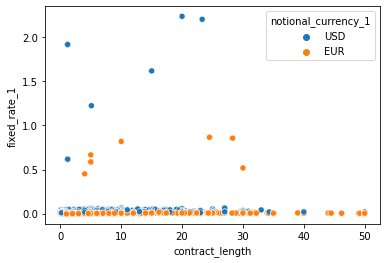

In [36]:
import seaborn as sns

df_fixed_float_clean = df_fixed_float[['contract_length', 'notional_amount_1', 'notional_currency_1', 'fixed_rate_1']].dropna()
sns.scatterplot(x="contract_length", y="fixed_rate_1", data=df_fixed_float_clean, hue="notional_currency_1")

<AxesSubplot:xlabel='notional_amount_1', ylabel='fixed_rate_1'>

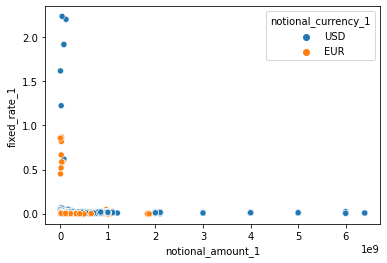

In [37]:
sns.scatterplot(x="notional_amount_1", y="fixed_rate_1", data=df_fixed_float_clean, hue="notional_currency_1")

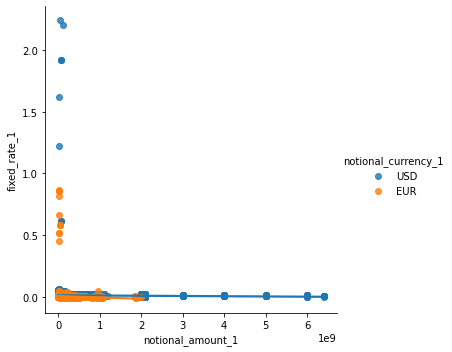

In [42]:
sns.lmplot(x="notional_amount_1", y="fixed_rate_1", 
           data=df_fixed_float_clean, hue="notional_currency_1");

In [44]:
from sklearn.linear_model import LinearRegression

df_fixed_float_clean['USD_var'] = df_fixed_float_clean['notional_currency_1'].apply(lambda x: 1 if x == 'USD' else 0)


LR = LinearRegression()

LR.fit(df_fixed_float_clean[['notional_amount_1', 'contract_length', 'USD_var']], 
       df_fixed_float_clean['fixed_rate_1'])

LinearRegression()

In [48]:
LR.predict([[10000000, 8, 1]])

/Users/dsr/opt/anaconda3/envs/NQIS/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.01522062])

In [49]:
LR.predict([[10000000, 8, 0]])

/Users/dsr/opt/anaconda3/envs/NQIS/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.00544273])

In [52]:
import pickle
with open('../data/model.obj', 'wb') as fp:
    pickle.dump(LR, fp)

In [53]:
import pickle
with open('../data/model.obj', 'rb') as fp:
    LR_new = pickle.load(fp)

In [54]:
LR_new.predict([[10000000, 8, 1]])

/Users/dsr/opt/anaconda3/envs/NQIS/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.01522062])

In [233]:
raw_df_master['Transaction Type'].unique()

array(['Trade', 'Termination', 'Amendment', 'Novation', 'Increase'],
      dtype=object)

In [234]:
relevant_columns = ['Product ID', 'Action', 'Transaction Type',  'Effective Date',
                    'Expiration Date', 'Leg 1 - Floating Rate Index', 'Leg 2 - Floating Rate Index', 
                    'Notional Amount 1', 'Notional Currency 1']

raw_df_master[relevant_columns]

,Product ID,Action,Transaction Type,Effective Date,Expiration Date,Leg 1 - Floating Rate Index,Leg 2 - Floating Rate Index,Notional Amount 1,Notional Currency 1
0,InterestRate:IRSwap:OIS,NEW,Trade,2022-02-24,2032-02-24,USD-SOFR-OIS COMPOUND,NaN,"100,000,000",USD
1,InterestRate:IRSwap:FixedFloat,NEW,Termination,2021-09-15,2026-09-15,CNY_REPO_CNRR007_BLMBERG_7DAY,NaN,"22,000,000",CNY
2,InterestRate:IRSwap:OIS,NEW,Trade,2022-03-16,2052-03-20,JPY-TONA-OIS COMPOUND,NaN,"2,000,000,000",JPY
3,InterestRate:IRSwap:OIS,NEW,Trade,2022-03-16,2052-03-20,JPY-TONA-OIS COMPOUND,NaN,"2,000,000,000",JPY
4,InterestRate:IRSwap:OIS,NEW,Trade,2022-03-16,2032-03-17,JPY-TONA-OIS COMPOUND,NaN,"7,000,000,000",JPY
...,...,...,...,...,...,...,...,...,...
458,InterestRate:IRSwap:OIS,CORRECT,Trade,2022-01-21,2044-01-22,NaN,GBP-SONIA-OIS COMPOUND,"57,000,000",GBP
459,InterestRate:IRSwap:OIS,CANCEL,Trade,2022-01-21,2044-01-22,NaN,GBP-SONIA-OIS COMPOUND,"57,000,000",GBP
460,InterestRate:IRSwap:OIS,CORRECT,Trade,2022-01-21,2044-01-22,NaN,GBP-SONIA-OIS COMPOUND,"57,000,000",GBP
461,InterestRate:IRSwap:OIS,CANCEL,Trade,2022-01-21,2044-01-22,NaN,GBP-SONIA-OIS COMPOUND,"57,000,000",GBP


In [235]:
raw_df_master['Notional Currency 1'].unique()

array(['USD', 'CNY', 'JPY', 'KRW', 'CLP', 'EUR', 'GBP', 'TRY', 'CZK',
       'NZD', 'CHF', 'PLN', 'BRL', 'CAD', 'MYR', 'NOK', 'MXN', 'SEK',
       'ILS', 'ZAR', 'HUF', 'SGD', 'SAR', 'AUD', 'RUB', 'IDR', 'COP',
       'MXV', 'PEN', 'THB', 'INR', 'CLF', 'GEL', 'HKD', 'TWD', 'DKK',
       'PHP', 'GHS', 'RON', 'UAH', 'AED', nan, 'NGN', 'PKR', 'KES'],
      dtype=object)

In [237]:
import investpy
# these currencies do not exist in the FX data so must ignore
[x for x in raw_df_master['Notional Currency 1'].unique() if x not in investpy.currency_crosses.get_available_currencies()]

['MXV', 'CLF', nan]

In [238]:
raw_df_master[raw_df_master['Notional Currency 1'].isin(['CLF', 'MXV', pd.NA])]

,Dissemination ID,Original Dissemination ID,Primary Asset Class,Product ID,Action,Transaction Type,Block Trade Election Indicator,Cleared,Clearing Exception or Exemption Indicator,Day Count Convention,...,Strike Price Currency,Underlying Asset ID,Underlying Asset ID Type,Underlying Asset Name,Leg 1 - Commodity Instrument ID,Leg 2 - Commodity Instrument ID,Option Type,Option Style,Execution Venue Type,Collateralization Type
1676,285282514,NaN,IR,InterestRate:CrossCurrency:FixedFloat,NEW,Trade,N,U,NaN,ACT/360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ON,NaN
1750,285286795,272234043.0,IR,InterestRate:CrossCurrency:FixedFloat,CANCEL,Trade,N,U,NaN,ACT/360,...,NaN,FIXED,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN
1751,285286796,272234043.0,IR,InterestRate:CrossCurrency:FixedFloat,CORRECT,Trade,N,U,NaN,ACT/360,...,NaN,FIXED,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN
3283,285155493,NaN,IR,InterestRate:CrossCurrency:FixedFloat,NEW,Trade,N,U,NaN,ACT/360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ON,NaN
3842,285143024,NaN,IR,InterestRate:CrossCurrency:FixedFloat,NEW,Trade,N,U,NaN,ACT/360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ON,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6525,268536798,NaN,IR,InterestRate:CrossCurrency:FixedFloat,NEW,Trade,N,U,NaN,ACT/360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ON,NaN
6526,268536799,NaN,IR,InterestRate:Exotic,NEW,Amendment,Y,U,NaN,30/360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN
6535,268536928,NaN,IR,InterestRate:CrossCurrency:FixedFloat,NEW,Trade,N,U,NaN,ACT/360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ON,NaN
7882,268513729,NaN,IR,InterestRate:Exotic,NEW,Amendment,N,U,NaN,30/360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN


In [239]:
pd.to_datetime(raw_df_master['Effective Date']).sort_values()

3062    1993-08-12
6737    1997-12-23
8199    1998-01-08
54      1998-07-03
55      1998-07-03
           ...    
6       2062-07-03
3717    2066-12-15
9279    2067-02-04
27944   2067-02-04
7019    2068-06-18
Name: Effective Date, Length: 432800, dtype: datetime64[ns]

In [130]:
raw_df_master[raw_df_master['Dissemination ID'].duplicated()]

,Dissemination ID,Original Dissemination ID,Primary Asset Class,Product ID,Action,Transaction Type,Block Trade Election Indicator,Cleared,Clearing Exception or Exemption Indicator,Day Count Convention,...,Strike Price Currency,Underlying Asset ID,Underlying Asset ID Type,Underlying Asset Name,Leg 1 - Commodity Instrument ID,Leg 2 - Commodity Instrument ID,Option Type,Option Style,Execution Venue Type,Collateralization Type


In [240]:
# this series has no NaN data -> perfect for currency conversion!
raw_df_master['Event Timestamp'][raw_df_master['Event Timestamp'].isna()]

Series([], Name: Event Timestamp, dtype: object)

In [241]:
# incorrectly entered data -> further investigation required to really know where it belongs, lets ignore
raw_df_master['Event Timestamp'][pd.to_datetime(raw_df_master['Event Timestamp'], errors='coerce').isna()]

4233     0022-02-20T00:30:00
10696    0022-02-20T14:22:00
10697    0022-02-20T14:22:00
12404    0022-02-13T15:59:00
12408    0022-02-13T16:57:00
13710    0022-02-13T16:57:00
15700    0022-02-13T13:40:00
1430     0022-02-05T15:47:00
Name: Event Timestamp, dtype: object

In [242]:
raw_df_master['Event Timestamp'][~pd.to_datetime(raw_df_master['Event Timestamp'], errors='coerce').isna()]

0      2022-02-22T02:12:21
1      2022-02-22T02:12:36
2      2022-02-22T02:09:49
3      2022-02-22T02:09:47
4      2022-02-22T02:09:44
              ...         
458    2022-01-21T13:08:57
459    2022-01-21T08:08:57
460    2022-01-21T13:08:57
461    2022-01-21T08:08:57
462    2022-01-21T13:08:57
Name: Event Timestamp, Length: 432792, dtype: object

In [243]:
# removing strange timestamps
raw_df_master = raw_df_master[~pd.to_datetime(raw_df_master['Event Timestamp'], errors='coerce').isna()]
raw_df_master = raw_df_master[raw_df_master['Event Timestamp'] != '1970-01-01T00:00:00']
#removing irrelevan fx data
bad_currencies = [x for x in raw_df_master['Notional Currency 1'].unique() if x not in investpy.currency_crosses.get_available_currencies()]

In [244]:
raw_df_master = raw_df_master[~raw_df_master['Notional Currency 1'].isin(bad_currencies)]
raw_df_master['exch_date'] = pd.to_datetime(raw_df_master['Event Timestamp']).dt.date
raw_df_master

,Dissemination ID,Original Dissemination ID,Primary Asset Class,Product ID,Action,Transaction Type,Block Trade Election Indicator,Cleared,Clearing Exception or Exemption Indicator,Day Count Convention,...,Underlying Asset ID,Underlying Asset ID Type,Underlying Asset Name,Leg 1 - Commodity Instrument ID,Leg 2 - Commodity Instrument ID,Option Type,Option Style,Execution Venue Type,Collateralization Type,exch_date
0,284229510,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,C,N,ACT/360,...,USD-SOFR-OIS COMPOUND,NaN,NaN,NaN,NaN,NaN,NaN,ON,NaN,2022-02-22
1,284229513,NaN,IR,InterestRate:IRSwap:FixedFloat,NEW,Termination,N,U,NaN,ACT/365.FIXED,...,CNY_REPO_CNRR007_BLMBERG_7DAY,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22
2,284229514,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,JPY-TONA-OIS COMPOUND,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22
3,284229515,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,JPY-TONA-OIS COMPOUND,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22
4,284229516,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,JPY-TONA-OIS COMPOUND,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,267956451,267784031.0,IR,InterestRate:IRSwap:OIS,CORRECT,Trade,N,U,N,ACT/365.FIXED,...,FIXED,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-01-21
459,267956452,267784031.0,IR,InterestRate:IRSwap:OIS,CANCEL,Trade,N,U,N,ACT/365.FIXED,...,FIXED,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-01-21
460,267956453,267784031.0,IR,InterestRate:IRSwap:OIS,CORRECT,Trade,N,U,N,ACT/365.FIXED,...,FIXED,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-01-21
461,267956454,267784031.0,IR,InterestRate:IRSwap:OIS,CANCEL,Trade,N,U,N,ACT/365.FIXED,...,FIXED,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-01-21


In [245]:
raw_df_master.groupby('Notional Currency 1')['exch_date'].agg(['min', 'max']).head(5)

,min,max
Notional Currency 1,,
AED,2018-02-12,2022-02-15
AUD,2015-04-28,2022-02-22
BRL,2019-07-17,2022-02-22
CAD,2010-10-07,2022-02-22
CHF,2014-02-05,2022-02-22


In [246]:
base_currency = 'USD'
raw_df_master.groupby('Notional Currency 1')['exch_date'].agg(['min', 'max']).head(5).reset_index()

,Notional Currency 1,min,max
0,AED,2018-02-12,2022-02-15
1,AUD,2015-04-28,2022-02-22
2,BRL,2019-07-17,2022-02-22
3,CAD,2010-10-07,2022-02-22
4,CHF,2014-02-05,2022-02-22


In [247]:
investpy.get_currency_cross_historical_data(currency_cross='AED/USD', from_date='12/02/2018', to_date='15/02/2022')

,Open,High,Low,Close,Currency
Date,,,,,
2018-02-12,0.2722,0.2723,0.2722,0.2722,USD
2018-02-13,0.2722,0.2722,0.2722,0.2722,USD
2018-02-14,0.2722,0.2722,0.2722,0.2722,USD
2018-02-15,0.2722,0.2722,0.2722,0.2722,USD
2018-02-16,0.2722,0.2722,0.2722,0.2722,USD
...,...,...,...,...,...
2022-02-09,0.2723,0.2723,0.2722,0.2722,USD
2022-02-10,0.2723,0.2723,0.2722,0.2722,USD
2022-02-11,0.2723,0.2723,0.2722,0.2722,USD


In [248]:
import time

# probably best to order by date and then currency, rather than currency first and date second
currency_conv_dict = {}
unavailable_currencies = []

for index, row in exchange_rates_df.groupby('Notional Currency 1')['exch_date'].agg(['min', 'max']).reset_index().iterrows():
    start_date = row['min'].strftime('%d/%m/%Y')
    end_date = row['max'].strftime('%d/%m/%Y')
    currency_cross = f'{row["Notional Currency 1"]}/{base_currency}'
    print('Requesting fx data:' , currency_cross, start_date, end_date)
    try:
        df_fx = investpy.get_currency_cross_historical_data(currency_cross=f'{row["Notional Currency 1"]}/{base_currency}', 
                                    from_date=start_date, to_date=end_date)['Close']
        df_fx.index = df_fx.index.strftime('%d/%m/%Y')        
        currency_conv_dict[currency_cross] = df_fx.to_dict()
        time.sleep(1)
    except:
        print('Unable to find data for ', currency_cross)
        if base_currency == 'USD':
            temp_base_currency = 'EUR'
        elif base_currency == 'EUR':
            temp_base_currency = 'USD'
        currency_cross = f'{row["Notional Currency 1"]}/{temp_base_currency}'
        print('Requesting fx data:' , currency_cross, start_date, end_date)
        try:
            df_fx = investpy.get_currency_cross_historical_data(currency_cross=f'{row["Notional Currency 1"]}/{temp_base_currency}', 
                                        from_date=start_date, to_date=end_date)['Close']
            df_fx.index = df_fx.index.strftime('%d/%m/%Y')        
            currency_conv_dict[currency_cross] = df_fx.to_dict()
            time.sleep(1)
        except:
            print('Unable to find data for ', currency_cross)
            unavailable_currencies.append(row["Notional Currency 1"])
            print('Stopping search for this currency: ', row["Notional Currency 1"])
            

Requesting fx data: AED/USD 12/02/2018 15/02/2022
Requesting fx data: AUD/USD 28/04/2015 20/02/2022
Requesting fx data: BRL/USD 17/07/2019 20/02/2022
Requesting fx data: CAD/USD 07/10/2010 18/02/2022
Requesting fx data: CHF/USD 09/02/2015 18/02/2022
Requesting fx data: CLP/USD 02/04/2014 18/02/2022
Requesting fx data: CNY/USD 04/11/2019 18/02/2022
Requesting fx data: COP/USD 31/03/2020 18/02/2022
Requesting fx data: CZK/USD 09/04/2021 18/02/2022
Unable to find data for  CZK/USD
Requesting fx data: CZK/EUR 09/04/2021 18/02/2022
Unable to find data for  CZK/EUR
Stopping search for this currency:  CZK
Requesting fx data: DKK/USD 07/02/2013 18/02/2022
Requesting fx data: EUR/USD 08/10/2003 19/02/2022
Requesting fx data: GBP/USD 15/02/2001 19/02/2022
Requesting fx data: GEL/USD 18/01/2022 16/02/2022
Unable to find data for  GEL/USD
Requesting fx data: GEL/EUR 18/01/2022 16/02/2022
Requesting fx data: GHS/USD 10/02/2022 14/02/2022
Requesting fx data: HKD/USD 26/05/2017 18/02/2022
Requesting 

In [249]:
unavailable_currencies

['CZK', 'KES', 'NGN', 'PKR', 'RON']

In [250]:
raw_df_master.shape

(432246, 70)

In [251]:
raw_df_master = raw_df_master[~raw_df_master['Notional Currency 1'].isin(unavailable_currencies)]


In [277]:
raw_df_master['notional_amount_1_clean'] = pd.to_numeric(raw_df_master['Notional Amount 1'].apply(lambda x: re.compile(r'[^\d.]+').sub('', x)))

/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_8711/2120104416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_master['notional_amount_1_clean'] = pd.to_numeric(raw_df_master['Notional Amount 1'].apply(lambda x: re.compile(r'[^\d.]+').sub('', x)))


In [252]:
raw_df_master.shape

(426583, 70)

In [278]:
raw_df_master.head(10)

,Dissemination ID,Original Dissemination ID,Primary Asset Class,Product ID,Action,Transaction Type,Block Trade Election Indicator,Cleared,Clearing Exception or Exemption Indicator,Day Count Convention,...,Underlying Asset ID Type,Underlying Asset Name,Leg 1 - Commodity Instrument ID,Leg 2 - Commodity Instrument ID,Option Type,Option Style,Execution Venue Type,Collateralization Type,exch_date,notional_amount_1_clean
0,284229510,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,C,N,ACT/360,...,NaN,NaN,NaN,NaN,NaN,NaN,ON,NaN,2022-02-22,100000000
1,284229513,NaN,IR,InterestRate:IRSwap:FixedFloat,NEW,Termination,N,U,NaN,ACT/365.FIXED,...,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22,22000000
2,284229514,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22,2000000000
3,284229515,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22,2000000000
4,284229516,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22,7000000000
5,284229517,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22,11000000000
6,284229518,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22,7000000000
7,284229519,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22,2000000000
8,284229520,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22,6000000000
9,284229521,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,NaN,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22,4000000000


In [426]:
def convert_to_base_notional(r):
    #TODO - finalise and retest logic - easy to break the flow, needs further testing
    relevant_exchange_pair = f'{r["Notional Currency 1"]}/{base_currency}'
    if relevant_exchange_pair in ['EUR/EUR', 'USD/USD']:
        relevant_exchange_rate = 1
    else:
        # TODO - this only assumes  two currencies are possible 
        if base_currency == 'USD':
            second_base = 'EUR'
        else:
            second_base = 'USD'

        second_pair = f'{r["Notional Currency 1"]}/{second_base}'
        exchange_date = r['exch_date'].strftime('%d/%m/%Y')
        fx_pair = currency_conv_dict.get(relevant_exchange_pair)
        if not fx_pair:
            fx_pair = currency_conv_dict.get(second_pair)
        relevant_exchange_rate = fx_pair.get(exchange_date)
        
        if not relevant_exchange_rate:
            last_30_days = [x.strftime('%d/%m/%Y') for x in pd.date_range(end=r['exch_date'], periods=30).tolist()][::-1]
            for date in last_30_days:
                if fx_pair.get(date):
                    relevant_exchange_rate = fx_pair.get(date)
                    # rounded up to nearest integer for simplicity
                    #. correcting for JPY incorrect data
                    if relevant_exchange_pair == 'JPY/USD' or relevant_exchange_pair == 'JPY/EUR':
                        relevant_exchange_rate = relevant_exchange_rate / 100
                    base_amount = int(relevant_exchange_rate * r['notional_amount_1_clean'])
                    return base_amount
    if relevant_exchange_rate:
        # rounded up to nearest integer for simplicity
        #. correcting for JPY incorrect data
        if relevant_exchange_pair == 'JPY/USD' or relevant_exchange_pair == 'JPY/EUR':
            relevant_exchange_rate = relevant_exchange_rate / 100
        base_amount = int(relevant_exchange_rate * r['notional_amount_1_clean'])
        return base_amount
    else:
        return None

# some strange behaviour with automatic conversion to float...
raw_df_master['notional_1_base'] = raw_df_master[['notional_amount_1_clean', 'Notional Currency 1', 'exch_date']]. \
        apply(convert_to_base_notional, axis = 1).astype(int, errors='ignore')

raw_df_master.head(10)

/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/ipykernel_8711/766391944.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_master['notional_1_base'] = raw_df_master[['notional_amount_1_clean', 'Notional Currency 1', 'exch_date']]. \


,Dissemination ID,Original Dissemination ID,Primary Asset Class,Product ID,Action,Transaction Type,Block Trade Election Indicator,Cleared,Clearing Exception or Exemption Indicator,Day Count Convention,...,Underlying Asset Name,Leg 1 - Commodity Instrument ID,Leg 2 - Commodity Instrument ID,Option Type,Option Style,Execution Venue Type,Collateralization Type,exch_date,notional_amount_1_clean,notional_1_base
0,284229510,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,C,N,ACT/360,...,NaN,NaN,NaN,NaN,NaN,ON,NaN,2022-02-22,100000000,100000000.0
1,284229513,NaN,IR,InterestRate:IRSwap:FixedFloat,NEW,Termination,N,U,NaN,ACT/365.FIXED,...,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22,22000000,3478200.0
2,284229514,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22,2000000000,17384000.0
3,284229515,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22,2000000000,17384000.0
4,284229516,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22,7000000000,60844000.0
5,284229517,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22,11000000000,95612000.0
6,284229518,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22,7000000000,60844000.0
7,284229519,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22,2000000000,17384000.0
8,284229520,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22,6000000000,52152000.0
9,284229521,NaN,IR,InterestRate:IRSwap:OIS,NEW,Trade,N,U,N,ACT/365.FIXED,...,NaN,NaN,NaN,NaN,NaN,OFF,NaN,2022-02-22,4000000000,34768000.0


In [384]:
raw_df_master[raw_df_master['notional_1_base'].isna()][['notional_amount_1_clean', 'Notional Currency 1', 'exch_date', 'notional_1_base',]]

,notional_amount_1_clean,Notional Currency 1,exch_date,notional_1_base
1757,10245600000,JPY,2017-02-22,NaN
3217,120000000,TRY,2018-12-12,NaN
3218,120000000,TRY,2018-12-12,NaN
3763,25000000,PLN,2014-09-04,NaN
3764,25000000,PLN,2014-09-04,NaN
...,...,...,...,...
12965,5027220000,JPY,2015-04-22,NaN
12968,1030140000,JPY,2016-07-20,NaN
12969,1028295000,JPY,2016-07-20,NaN
12998,3535705005,JPY,2016-06-07,NaN


In [322]:
currency_conv_dict.get('JPY/USD').keys()

dict_keys(['15/02/2018', '16/02/2018', '19/02/2018', '20/02/2018', '21/02/2018', '22/02/2018', '23/02/2018', '26/02/2018', '27/02/2018', '28/02/2018', '01/03/2018', '02/03/2018', '05/03/2018', '06/03/2018', '07/03/2018', '08/03/2018', '09/03/2018', '12/03/2018', '13/03/2018', '14/03/2018', '15/03/2018', '16/03/2018', '19/03/2018', '20/03/2018', '21/03/2018', '22/03/2018', '23/03/2018', '26/03/2018', '27/03/2018', '28/03/2018', '29/03/2018', '30/03/2018', '02/04/2018', '03/04/2018', '04/04/2018', '05/04/2018', '06/04/2018', '09/04/2018', '10/04/2018', '11/04/2018', '12/04/2018', '13/04/2018', '16/04/2018', '17/04/2018', '18/04/2018', '19/04/2018', '20/04/2018', '23/04/2018', '24/04/2018', '25/04/2018', '26/04/2018', '27/04/2018', '30/04/2018', '01/05/2018', '02/05/2018', '03/05/2018', '04/05/2018', '07/05/2018', '08/05/2018', '09/05/2018', '10/05/2018', '11/05/2018', '14/05/2018', '15/05/2018', '16/05/2018', '17/05/2018', '18/05/2018', '21/05/2018', '22/05/2018', '23/05/2018', '24/05/20

In [427]:
final_df = raw_df_master[~raw_df_master['notional_1_base'].isna()].reset_index(drop=True)

In [428]:
final_df[['notional_amount_1_clean', 'Notional Currency 1', 'exch_date', 'notional_1_base']]

,notional_amount_1_clean,Notional Currency 1,exch_date,notional_1_base
0,100000000,USD,2022-02-22,100000000.0
1,22000000,CNY,2022-02-22,3478200.0
2,2000000000,JPY,2022-02-22,17384000.0
3,2000000000,JPY,2022-02-22,17384000.0
4,7000000000,JPY,2022-02-22,60844000.0
...,...,...,...,...
426464,57000000,GBP,2022-01-21,77257800.0
426465,57000000,GBP,2022-01-21,77257800.0
426466,57000000,GBP,2022-01-21,77257800.0
426467,57000000,GBP,2022-01-21,77257800.0


In [429]:
# checking some currencies for correct ordering...
final_df[['notional_amount_1_clean', 'Notional Currency 1', 'exch_date', 'notional_1_base']].loc[3]

notional_amount_1_clean    2000000000
Notional Currency 1               JPY
exch_date                  2022-02-22
notional_1_base            17384000.0
Name: 3, dtype: object

In [549]:
# creating some extra metrics for analysis
final_df['expiration_year'] = pd.to_datetime(final_df['Expiration Date']).dt.strftime('%Y')
final_df['contract_length'] = ((pd.to_datetime(final_df['Expiration Date']) - pd.to_datetime(final_df['exch_date'])).dt.days / 365)
# rounding to nearest 0.5 years to help with analysis
final_df['contract_length'] = round(final_df['contract_length'] * 2) / 2

In [28]:
final_df['Original Dissemination ID'] = final_df['Original Dissemination ID'].astype(int, errors='ignore')

In [552]:
final_df['contract_length'].value_counts()

 0.5     62411
 10.0    53743
 1.0     53157
 5.0     46515
 2.0     33562
         ...  
 52.5        2
 51.0        1
-1.5         1
-0.5         1
 41.5        1
Name: contract_length, Length: 111, dtype: int64

In [29]:
final_columns = ['Dissemination ID', 'Original Dissemination ID', 'Product ID', 'Action', 'Transaction Type',  'Effective Date',
                    'Expiration Date', 'Leg 1 - Floating Rate Index', 'Leg 2 - Floating Rate Index', 
                    'Notional Amount 1', 'Notional Currency 1', 'notional_amount_1_clean', 
                    'exch_date', 'notional_1_base', 'expiration_year', 'contract_length']

In [30]:
final_df[final_columns].fillna('-').to_csv('../data/final_data.csv', index=False)

In [447]:
(final_df.groupby(['Product ID', 'Notional Currency 1']).sum()['notional_1_base']/1000000).astype(int). \
        sort_values(ascending=False).head(20)

Product ID                        Notional Currency 1
InterestRate:IRSwap:FixedFloat    USD                    18024085
InterestRate:IRSwap:OIS           USD                    13341178
InterestRate:FRA                  EUR                     8255597
InterestRate:IRSwap:OIS           EUR                     5257280
InterestRate:IRSwap:FixedFloat    EUR                     4167236
InterestRate:IRSwap:OIS           GBP                     3619271
InterestRate:Option:Swaption      USD                     2643083
                                  EUR                     1957076
InterestRate:IRSwap:Basis         USD                     1824278
InterestRate:IRSwap:OIS           AUD                     1344766
InterestRate:CrossCurrency:Basis  EUR                     1325123
InterestRate:IRSwap:FixedFloat    MXN                      986465
                                  CAD                      697393
InterestRate:Exotic               USD                      669715
InterestRate:IRSwap:Fi

In [448]:
(final_df.groupby(['Notional Currency 1']).sum()['notional_1_base']/1000000).astype(int).\
        sort_values(ascending=False).head(20)

Notional Currency 1
USD    37627916
EUR    21946264
GBP     4637125
AUD     2223145
CAD     1314966
JPY     1151162
MXN     1026097
CLP      449760
SEK      336953
NZD      334651
COP      230842
ZAR      211712
PLN      199911
BRL      161986
INR      137105
KRW      134782
CHF      131478
CNY      125441
NOK       80134
SGD       65513
Name: notional_1_base, dtype: int64

<AxesSubplot:ylabel='notional_1_base'>

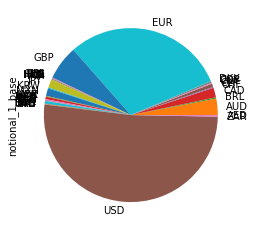

In [474]:
final_df.groupby(['Notional Currency 1']).sum()['notional_1_base'].plot(kind='pie')

In [449]:
(final_df.groupby(['Product ID']).sum()['notional_1_base']/1000000).astype(int).sort_values(ascending=False).head(20)

Product ID
InterestRate:IRSwap:FixedFloat           26151241
InterestRate:IRSwap:OIS                  25137379
InterestRate:FRA                          8930691
InterestRate:Option:Swaption              5209519
InterestRate:CrossCurrency:Basis          2928650
InterestRate:IRSwap:Basis                 1988812
InterestRate:Exotic                       1078865
InterestRate:CapFloor                      796813
InterestRate:IRSwap:Inflation              492843
InterestRate:CrossCurrency:FixedFloat       79381
InterestRate:CrossCurrency:FixedFixed       53363
InterestRate:Option:DebtOption               2863
InterestRate:IRSwap:FixedFixed               1684
InterestRate:Forward:Debt                     417
Name: notional_1_base, dtype: int64

In [451]:
(final_df.groupby(['Leg 1 - Floating Rate Index', 'Leg 2 - Floating Rate Index']). \
     sum()['notional_1_base']/1000000).astype(int).sort_values(ascending=False).head(30)

Leg 1 - Floating Rate Index  Leg 2 - Floating Rate Index        
EUR-EUROSTR-OIS COMPOUND     USD-SOFR-OIS COMPOUND                  967690
USD-LIBOR                    USD-LIBOR                              821247
USD-SOFR-OIS COMPOUND        USD-LIBOR                              408793
JPY-TONA-OIS COMPOUND        USD-SOFR-OIS COMPOUND                  372323
EUR-EUROSTR-COMPOUND         USD-SOFR-COMPOUND                      313091
GBP-SONIA-OIS COMPOUND       USD-SOFR-OIS COMPOUND                  257981
USD-SOFR-OIS COMPOUND        USD-FEDERAL FUNDS-OIS COMPOUND         229706
JPY-TONA-OIS-COMPOUND        USD-SOFR-COMPOUND                      118192
USD-LIBOR-BBA                USD-LIBOR-BBA                          101761
GBP-SONIA-COMPOUND           USD-SOFR-COMPOUND                       98395
AUD-BBSW                     USD-SOFR-OIS COMPOUND                   91100
CAD-CDOR                     USD-SOFR-OIS COMPOUND                   70608
USD-SOFR-COMPOUND            USD-LI

<AxesSubplot:ylabel='notional_1_base'>

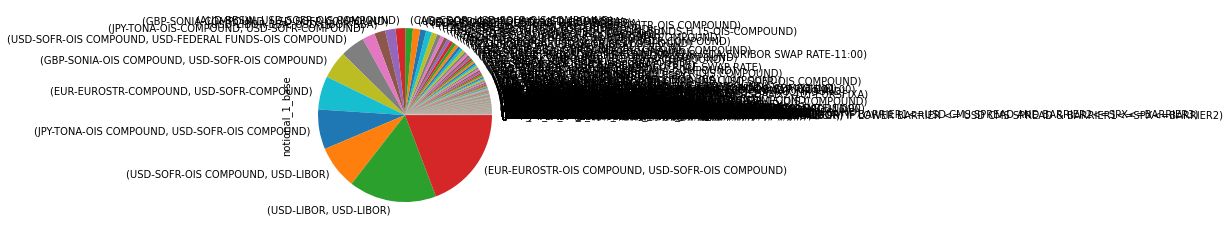

In [484]:
final_df.groupby(['Leg 1 - Floating Rate Index', 'Leg 2 - Floating Rate Index']). \
     sum()['notional_1_base'].sort_values().plot(kind='pie')

<AxesSubplot:xlabel='exch_date'>

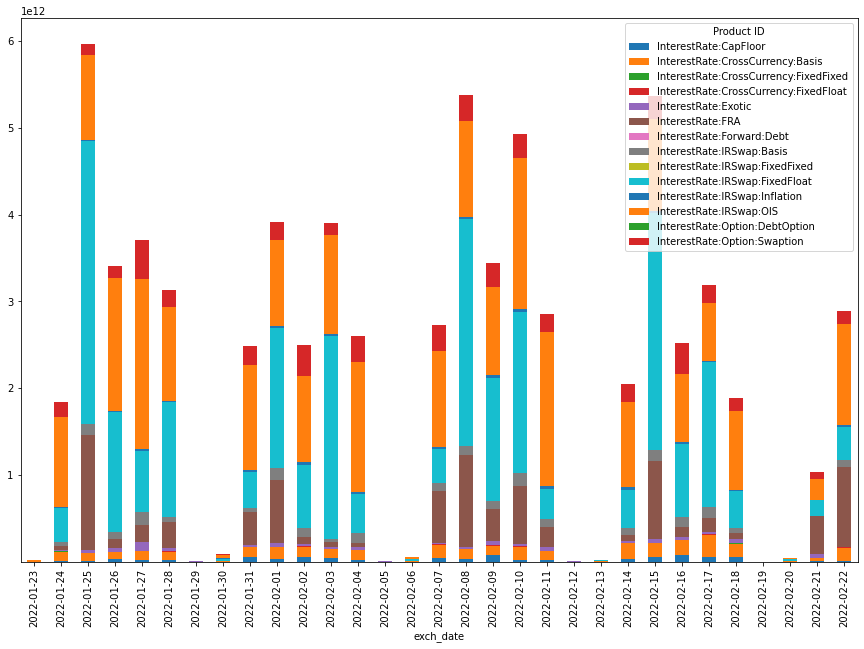

In [466]:
final_df.groupby(['exch_date', 'Product ID'])['notional_1_base'].sum().tail(300). \
    unstack().plot(kind='bar', stacked=True, figsize=(15,10))

In [543]:
final_df.groupby(['exch_date'])['notional_1_base'].sum().tail(300).index.to_series().apply(lambda x: x.strftime('%d-%m-%Y')).to_list()

['30-12-2020',
 '31-12-2020',
 '04-01-2021',
 '05-01-2021',
 '06-01-2021',
 '07-01-2021',
 '12-01-2021',
 '13-01-2021',
 '14-01-2021',
 '15-01-2021',
 '18-01-2021',
 '21-01-2021',
 '22-01-2021',
 '25-01-2021',
 '26-01-2021',
 '27-01-2021',
 '28-01-2021',
 '29-01-2021',
 '02-02-2021',
 '03-02-2021',
 '04-02-2021',
 '05-02-2021',
 '08-02-2021',
 '09-02-2021',
 '10-02-2021',
 '11-02-2021',
 '12-02-2021',
 '14-02-2021',
 '15-02-2021',
 '16-02-2021',
 '17-02-2021',
 '18-02-2021',
 '19-02-2021',
 '22-02-2021',
 '23-02-2021',
 '24-02-2021',
 '25-02-2021',
 '26-02-2021',
 '01-03-2021',
 '02-03-2021',
 '03-03-2021',
 '04-03-2021',
 '05-03-2021',
 '09-03-2021',
 '10-03-2021',
 '11-03-2021',
 '12-03-2021',
 '14-03-2021',
 '15-03-2021',
 '17-03-2021',
 '19-03-2021',
 '22-03-2021',
 '23-03-2021',
 '24-03-2021',
 '25-03-2021',
 '29-03-2021',
 '30-03-2021',
 '31-03-2021',
 '01-04-2021',
 '07-04-2021',
 '08-04-2021',
 '09-04-2021',
 '12-04-2021',
 '13-04-2021',
 '14-04-2021',
 '15-04-2021',
 '16-04-20

<AxesSubplot:xlabel='exch_date'>

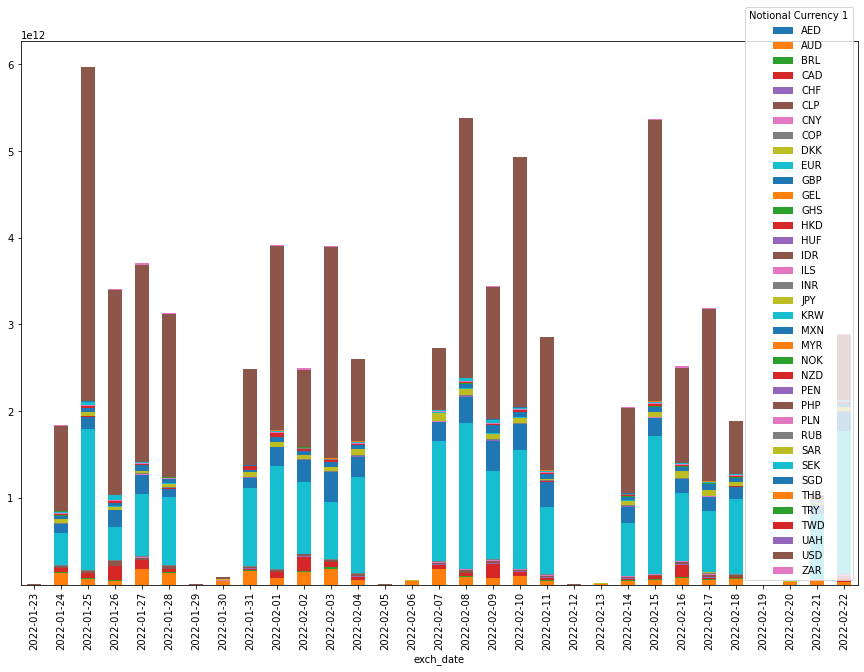

In [475]:
final_df.groupby(['exch_date', 'Notional Currency 1'])['notional_1_base'].sum().tail(750). \
    unstack().plot(kind='bar', stacked=True, figsize=(15,10))

<AxesSubplot:>

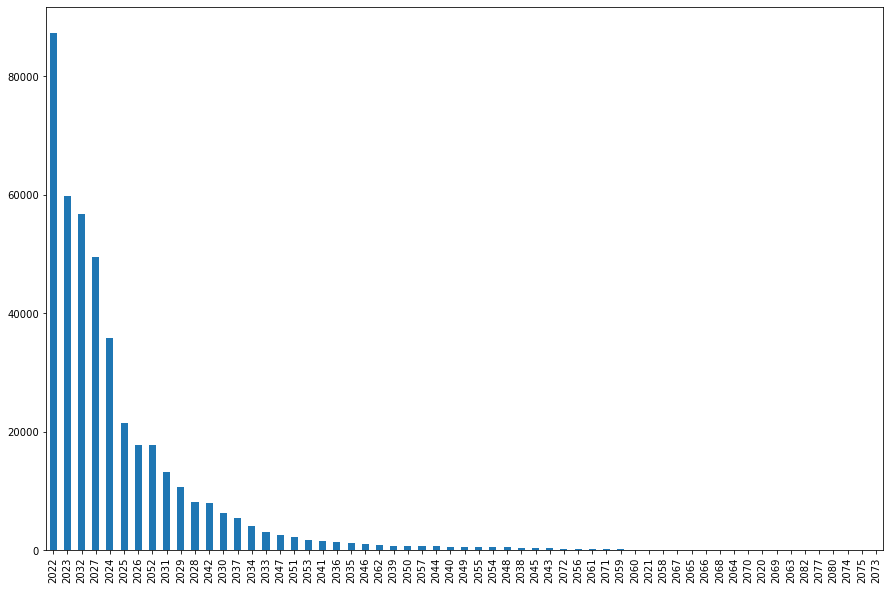

In [500]:
pd.to_datetime(final_df['Expiration Date']).dt.year.value_counts().plot(kind='bar', figsize=(15,10))

<AxesSubplot:>

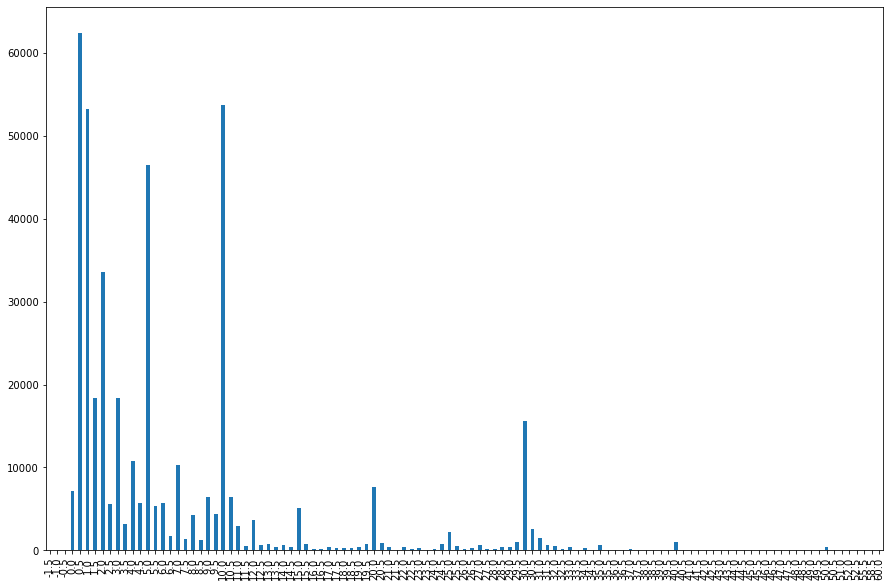

In [557]:
final_df['contract_length'].value_counts().sort_index().plot(kind='bar', figsize=(15,10))

In [558]:
final_df.groupby(['exch_date', 'Notional Currency 1'])['notional_1_base'].sum().tail(100). \
    unstack()

Notional Currency 1,EUR,GBP,HKD,HUF,ILS,INR,JPY,KRW,MXN,MYR,...,CNY,CHF,CLP,COP,IDR,SAR,CAD,DKK,GEL,PHP
exch_date,,,,,,,,,,,,,,,,,,,,,
2022-02-18,8.674473e+11,1.432771e+11,1.202347e+09,8.636454e+08,1.593696e+09,2.489000e+09,4.384795e+10,2.688033e+09,4.745223e+10,1.411517e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-19,1.358520e+08,3.411044e+07,NaN,NaN,NaN,NaN,NaN,2.090000e+07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-20,NaN,NaN,NaN,NaN,NaN,5.356000e+07,2.734291e+09,1.774661e+08,NaN,NaN,...,8.813379e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-21,7.521769e+11,9.687476e+10,4.688274e+08,1.105219e+09,4.122456e+09,2.132491e+09,2.300511e+10,2.059536e+09,1.606535e+08,3.639312e+08,...,9.474168e+09,3.718329e+09,2.144840e+08,1.301180e+05,73027500.0,77285000.0,NaN,NaN,NaN,NaN
2022-02-22,1.651812e+12,2.225775e+11,6.328837e+08,6.642457e+09,1.530984e+09,3.659557e+09,3.915177e+10,7.099463e+09,3.891208e+10,2.261436e+08,...,6.337111e+09,1.037644e+10,1.694748e+10,1.019359e+10,38948000.0,134849000.0,3.867602e+10,5022600.0,138650000.0,20542866.0


In [560]:
final_df.groupby(['exch_date', 'Notional Currency 1'])['notional_1_base'].sum().tail(100). \
    unstack().fillna(0).to_dict()

{'EUR': {datetime.date(2022, 2, 18): 867447283306.0,
  datetime.date(2022, 2, 19): 135852000.0,
  datetime.date(2022, 2, 20): 0.0,
  datetime.date(2022, 2, 21): 752176900036.0,
  datetime.date(2022, 2, 22): 1651811987973.0},
 'GBP': {datetime.date(2022, 2, 18): 143277091360.0,
  datetime.date(2022, 2, 19): 34110439.0,
  datetime.date(2022, 2, 20): 0.0,
  datetime.date(2022, 2, 21): 96874764663.0,
  datetime.date(2022, 2, 22): 222577520047.0},
 'HKD': {datetime.date(2022, 2, 18): 1202346523.0,
  datetime.date(2022, 2, 19): 0.0,
  datetime.date(2022, 2, 20): 0.0,
  datetime.date(2022, 2, 21): 468827400.0,
  datetime.date(2022, 2, 22): 632883658.0},
 'HUF': {datetime.date(2022, 2, 18): 863645400.0,
  datetime.date(2022, 2, 19): 0.0,
  datetime.date(2022, 2, 20): 0.0,
  datetime.date(2022, 2, 21): 1105218540.0,
  datetime.date(2022, 2, 22): 6642457037.0},
 'ILS': {datetime.date(2022, 2, 18): 1593696000.0,
  datetime.date(2022, 2, 19): 0.0,
  datetime.date(2022, 2, 20): 0.0,
  datetime.date

In [563]:
final_df.groupby(['exch_date', 'Notional Currency 1'])['notional_1_base'].sum(). \
    unstack().index

Index([1999-12-31, 2000-01-01, 2001-02-15, 2003-04-17, 2003-10-08, 2004-03-23,
       2004-12-03, 2005-05-03, 2006-03-28, 2006-03-29,
       ...
       2022-02-13, 2022-02-14, 2022-02-15, 2022-02-16, 2022-02-17, 2022-02-18,
       2022-02-19, 2022-02-20, 2022-02-21, 2022-02-22],
      dtype='object', name='exch_date', length=1346)

In [566]:
for key, value in final_df.groupby(['exch_date', 'Notional Currency 1'])['notional_1_base'].sum().tail(100). \
    unstack().fillna(0).to_dict().items():
    print(key)
    print(list(value.values()))

EUR
[867447283306.0, 135852000.0, 0.0, 752176900036.0, 1651811987973.0]
GBP
[143277091360.0, 34110439.0, 0.0, 96874764663.0, 222577520047.0]
HKD
[1202346523.0, 0.0, 0.0, 468827400.0, 632883658.0]
HUF
[863645400.0, 0.0, 0.0, 1105218540.0, 6642457037.0]
ILS
[1593696000.0, 0.0, 0.0, 4122456000.0, 1530984000.0]
INR
[2489000150.0, 0.0, 53560000.0, 2132491400.0, 3659557357.0]
JPY
[43847954318.0, 0.0, 2734290922.0, 23005105819.0, 39151774889.0]
KRW
[2688032600.0, 20900000.0, 177466080.0, 2059536160.0, 7099462848.0]
MXN
[47452231098.0, 0.0, 0.0, 160653500.0, 38912084733.0]
MYR
[1411516918.0, 0.0, 0.0, 363931200.0, 226143600.0]
NOK
[13575898675.0, 0.0, 0.0, 327300600.0, 2067366929.0]
NZD
[2962834353.0, 0.0, 1988133909.0, 10187629901.0, 15090788714.0]
PEN
[85109200.0, 0.0, 0.0, 0.0, 20009999.0]
PLN
[9285789804.0, 0.0, 0.0, 6193291400.0, 8263471640.0]
RUB
[556635000.0, 0.0, 0.0, 541671000.0, 1273091712.0]
SEK
[12661786865.0, 0.0, 0.0, 14023962851.0, 11441012949.0]
SGD
[1679470800.0, 0.0, 28226400

In [ ]:
for key, value in final_df.groupby(['exch_date', 'Actiin'])['notional_1_base'].sum().tail(100). \
    unstack().fillna(0).to_dict().items():
    print(key)
    print(list(value.values()))

In [569]:
len(final_df)

426469

In [586]:
final_df['exch_date'].max()
final_df[final_df['exch_date'] == final_df['exch_date'].max()].groupby(['Notional Currency 1'])['notional_1_base'].sum().sort_values()[-1]

1651811987973.0

In [588]:
1651811987973 / 1000000000

1651.811987973

In [590]:
final_df[final_df['exch_date'] == final_df['exch_date'].max()].groupby(['Notional Currency 1'])['notional_1_base'].sum().sort_values()

Notional Currency 1
DKK    5.022600e+06
PEN    2.001000e+07
PHP    2.054287e+07
IDR    3.894800e+07
SAR    1.348490e+08
GEL    1.386500e+08
MYR    2.261436e+08
TRY    5.562468e+08
HKD    6.328837e+08
TWD    7.018128e+08
THB    1.081583e+09
RUB    1.273092e+09
ILS    1.530984e+09
NOK    2.067367e+09
SGD    2.956344e+09
BRL    3.552918e+09
INR    3.659557e+09
CNY    6.337111e+09
HUF    6.642457e+09
KRW    7.099463e+09
PLN    8.263472e+09
ZAR    1.017685e+10
COP    1.019359e+10
CHF    1.037644e+10
SEK    1.144101e+10
NZD    1.509079e+10
CLP    1.694748e+10
AUD    3.225563e+10
CAD    3.867602e+10
MXN    3.891208e+10
JPY    3.915177e+10
GBP    2.225775e+11
USD    7.421005e+11
EUR    1.651812e+12
Name: notional_1_base, dtype: float64

In [596]:
type(final_df[final_df['exch_date'] == final_df['exch_date'].max()].groupby(['Notional Currency 1'])['notional_1_base'].sum().sort_values()[-1])

numpy.float64

In [603]:
final_df[final_df['exch_date'] == final_df['exch_date'].max()]. \
    groupby(['Notional Currency 1', 'Product ID'])['notional_1_base'].sum().unstack().fillna(0).to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th>Product ID</th>\n      <th>InterestRate:CapFloor</th>\n      <th>InterestRate:CrossCurrency:Basis</th>\n      <th>InterestRate:CrossCurrency:FixedFixed</th>\n      <th>InterestRate:CrossCurrency:FixedFloat</th>\n      <th>InterestRate:Exotic</th>\n      <th>InterestRate:FRA</th>\n      <th>InterestRate:IRSwap:Basis</th>\n      <th>InterestRate:IRSwap:FixedFixed</th>\n      <th>InterestRate:IRSwap:FixedFloat</th>\n      <th>InterestRate:IRSwap:Inflation</th>\n      <th>InterestRate:IRSwap:OIS</th>\n      <th>InterestRate:Option:Swaption</th>\n    </tr>\n    <tr>\n      <th>Notional Currency 1</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>AUD</th>\n      <td>0.000000e+00</td>\n 

In [608]:
final_df[final_df['exch_date'] == final_df['exch_date'].max()].groupby(['Notional Currency 1'])['notional_1_base'].sum().sort_values()[-10:]

Notional Currency 1
SEK    1.144101e+10
NZD    1.509079e+10
CLP    1.694748e+10
AUD    3.225563e+10
CAD    3.867602e+10
MXN    3.891208e+10
JPY    3.915177e+10
GBP    2.225775e+11
USD    7.421005e+11
EUR    1.651812e+12
Name: notional_1_base, dtype: float64

In [609]:
(final_df.groupby(['Product ID', 'Notional Currency 1']).sum()['notional_1_base']/1000000).astype(int). \
        sort_values(ascending=False).head(20)

Product ID                        Notional Currency 1
InterestRate:IRSwap:FixedFloat    USD                    18024085
InterestRate:IRSwap:OIS           USD                    13341178
InterestRate:FRA                  EUR                     8255597
InterestRate:IRSwap:OIS           EUR                     5257280
InterestRate:IRSwap:FixedFloat    EUR                     4167236
InterestRate:IRSwap:OIS           GBP                     3619271
InterestRate:Option:Swaption      USD                     2643083
                                  EUR                     1957076
InterestRate:IRSwap:Basis         USD                     1824278
InterestRate:IRSwap:OIS           AUD                     1344766
InterestRate:CrossCurrency:Basis  EUR                     1325123
InterestRate:IRSwap:FixedFloat    MXN                      986465
                                  CAD                      697393
InterestRate:Exotic               USD                      669715
InterestRate:IRSwap:Fi

In [621]:
final_df.groupby(['Notional Currency 1', 'Leg 1 - Floating Rate Index', 'Leg 2 - Floating Rate Index'])['notional_1_base']. \
    agg(['sum', 'mean', 'min', 'max', 'count']).astype(int).reset_index().sort_values('sum', ascending=False)

,Notional Currency 1,Leg 1 - Floating Rate Index,Leg 2 - Floating Rate Index,sum,mean,min,max,count
106,EUR,EUR-EUROSTR-OIS COMPOUND,USD-SOFR-OIS COMPOUND,967690684862,280734170,189062,6431311584,3447
292,USD,USD-LIBOR,USD-LIBOR,821247000000,909465116,4000000,2100000000,903
404,USD,USD-SOFR-OIS COMPOUND,USD-LIBOR,408793000000,187950804,6000000,2100000000,2175
185,JPY,JPY-TONA-OIS COMPOUND,USD-SOFR-OIS COMPOUND,371823540249,230802942,0,2097683184,1611
102,EUR,EUR-EUROSTR-COMPOUND,USD-SOFR-COMPOUND,312497443654,150311420,0,2100679506,2079
...,...,...,...,...,...,...,...,...
239,USD,3M LIBOR + SPREAD,LEV CMS30-CMS5,3600,3600,3600,3600,1
409,USD,USD3MFSR,USD3MFSR,25,5,5,5,5
29,CAD,CAD-CORRA-OIS COMPOUND,USD-SOFR-OIS COMPOUND,12,3,3,3,4
101,EUR,EUR-EUROSTR-COMPOUND,USD-FEDERAL FUNDS-H.15-OIS-COMPOUND,0,0,0,0,2


In [738]:
ml_df = final_df.fillna('-').groupby(['Product ID', 'Leg 1 - Floating Rate Index', 'Leg 2 - Floating Rate Index'])['notional_1_base']. \
    sum().astype(int)

# ml_df.index = ml_df.index.set_levels(ml_df.index.levels[1] + '&' + ml_df.index.levels[2], level=1)

# ml_df

# ml_df.index = pd.MultiIndex.from_tuples([(x[0], x[1] + ' & '+ x[2]) for x in ml_df.index])

ml_df.index = pd.MultiIndex.from_tuples([(x[0], " & ".join(x[1:])) for x in ml_df.index])

ml_df
# ml_df.unstack().fillna(0).round(1).plot(kind='bar', stacked=True)

InterestRate:CapFloor         - & -                         34964302807
                              3M-EUR-EURIBOR-REUTERS & -      301719800
                              3M-USD-LIBOR-BBA & -            200000000
                              6M-EUR-EURIBOR-REUTERS & -      904240000
                              AED-EBOR-REUTERS & -             40830000
                                                               ...     
InterestRate:Option:Swaption  USD-SOFR-H15 & -                820000000
                              USD-SOFR-NYFED & -              390000000
                              USD-SOFR-OIS COMPOUND & -     11437000000
                              USD-SOFR-SOFR & -              1022000000
                              ZAR-JIBAR-SAFEX & -              92750000
Name: notional_1_base, Length: 1253, dtype: int64

In [739]:
set([x[0] for x in pd.MultiIndex.from_tuples([(x[0], " & ".join(x[1:])) for x in ml_df.index])])

{'InterestRate:CapFloor',
 'InterestRate:CrossCurrency:Basis',
 'InterestRate:CrossCurrency:FixedFixed',
 'InterestRate:CrossCurrency:FixedFloat',
 'InterestRate:Exotic',
 'InterestRate:FRA',
 'InterestRate:Forward:Debt',
 'InterestRate:IRSwap:Basis',
 'InterestRate:IRSwap:FixedFixed',
 'InterestRate:IRSwap:FixedFloat',
 'InterestRate:IRSwap:Inflation',
 'InterestRate:IRSwap:OIS',
 'InterestRate:Option:DebtOption',
 'InterestRate:Option:Swaption'}

In [702]:
set(final_df.groupby(['Product ID'])['Notional Currency 1'].count().index)

{'InterestRate:CapFloor',
 'InterestRate:CrossCurrency:Basis',
 'InterestRate:CrossCurrency:FixedFixed',
 'InterestRate:CrossCurrency:FixedFloat',
 'InterestRate:Exotic',
 'InterestRate:FRA',
 'InterestRate:Forward:Debt',
 'InterestRate:IRSwap:Basis',
 'InterestRate:IRSwap:FixedFixed',
 'InterestRate:IRSwap:FixedFloat',
 'InterestRate:IRSwap:Inflation',
 'InterestRate:IRSwap:OIS',
 'InterestRate:Option:DebtOption',
 'InterestRate:Option:Swaption'}

<AxesSubplot:xlabel='Notional Currency 1'>

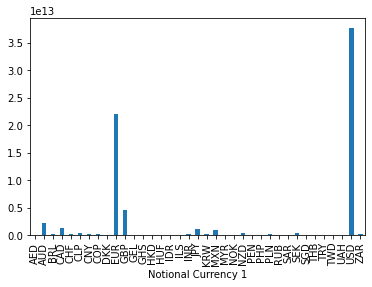

In [743]:
final_df.groupby(['Notional Currency 1'])['notional_1_base']. \
    sum().astype(int).plot(kind='bar')

In [31]:
final_df = pd.read_csv('../data/final_data.csv')

In [35]:
final_df

,Dissemination ID,Original Dissemination ID,Product ID,Action,Transaction Type,Effective Date,Expiration Date,Leg 1 - Floating Rate Index,Leg 2 - Floating Rate Index,Notional Amount 1,Notional Currency 1,notional_amount_1_clean,exch_date,notional_1_base,expiration_year,contract_length
0,284229510,-,InterestRate:IRSwap:OIS,NEW,Trade,2022-02-24,2032-02-24,USD-SOFR-OIS COMPOUND,-,"100,000,000",USD,100000000,2022-02-22,100000000.0,2032,10.0
1,284229513,-,InterestRate:IRSwap:FixedFloat,NEW,Termination,2021-09-15,2026-09-15,CNY_REPO_CNRR007_BLMBERG_7DAY,-,"22,000,000",CNY,22000000,2022-02-22,3478200.0,2026,4.5
2,284229514,-,InterestRate:IRSwap:OIS,NEW,Trade,2022-03-16,2052-03-20,JPY-TONA-OIS COMPOUND,-,"2,000,000,000",JPY,2000000000,2022-02-22,17384000.0,2052,30.0
3,284229515,-,InterestRate:IRSwap:OIS,NEW,Trade,2022-03-16,2052-03-20,JPY-TONA-OIS COMPOUND,-,"2,000,000,000",JPY,2000000000,2022-02-22,17384000.0,2052,30.0
4,284229516,-,InterestRate:IRSwap:OIS,NEW,Trade,2022-03-16,2032-03-17,JPY-TONA-OIS COMPOUND,-,"7,000,000,000",JPY,7000000000,2022-02-22,60844000.0,2032,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426464,267956451,267784031.0,InterestRate:IRSwap:OIS,CORRECT,Trade,2022-01-21,2044-01-22,-,GBP-SONIA-OIS COMPOUND,"57,000,000",GBP,57000000,2022-01-21,77257800.0,2044,22.0
426465,267956452,267784031.0,InterestRate:IRSwap:OIS,CANCEL,Trade,2022-01-21,2044-01-22,-,GBP-SONIA-OIS COMPOUND,"57,000,000",GBP,57000000,2022-01-21,77257800.0,2044,22.0
426466,267956453,267784031.0,InterestRate:IRSwap:OIS,CORRECT,Trade,2022-01-21,2044-01-22,-,GBP-SONIA-OIS COMPOUND,"57,000,000",GBP,57000000,2022-01-21,77257800.0,2044,22.0
426467,267956454,267784031.0,InterestRate:IRSwap:OIS,CANCEL,Trade,2022-01-21,2044-01-22,-,GBP-SONIA-OIS COMPOUND,"57,000,000",GBP,57000000,2022-01-21,77257800.0,2044,22.0


In [32]:
pd.Series(final_df['Original Dissemination ID'].dropna().to_list() + final_df['Dissemination ID'].dropna().to_list()).value_counts()

-              206280
267956443.0        76
267784031.0        16
283468183.0        16
283468182.0        14
                ...  
278388537           1
278333615           1
278335109           1
278335108           1
267956455           1
Length: 537616, dtype: int64

In [39]:
final_df['Original Dissemination ID'].value_counts()

-              206280
267956443.0        76
283468183.0        16
267784031.0        16
283468182.0        14
                ...  
271932497.0         1
271932496.0         1
281360497.0         1
280464104.0         1
275668804.0         1
Name: Original Dissemination ID, Length: 111147, dtype: int64

In [36]:
final_df[(final_df['Dissemination ID'] == 267956443) | (final_df['Original Dissemination ID'] == 267956443.0)]

,Dissemination ID,Original Dissemination ID,Product ID,Action,Transaction Type,Effective Date,Expiration Date,Leg 1 - Floating Rate Index,Leg 2 - Floating Rate Index,Notional Amount 1,Notional Currency 1,notional_amount_1_clean,exch_date,notional_1_base,expiration_year,contract_length
426456,267956443,267784031.0,InterestRate:IRSwap:OIS,CORRECT,Trade,2022-01-21,2044-01-22,-,GBP-SONIA-OIS COMPOUND,"57,000,000",GBP,57000000,2022-01-21,77257800.0,2044,22.0


In [38]:
final_df[(final_df['Dissemination ID'] == 267784031) | (final_df['Original Dissemination ID'] == 267784031.0)]

,Dissemination ID,Original Dissemination ID,Product ID,Action,Transaction Type,Effective Date,Expiration Date,Leg 1 - Floating Rate Index,Leg 2 - Floating Rate Index,Notional Amount 1,Notional Currency 1,notional_amount_1_clean,exch_date,notional_1_base,expiration_year,contract_length


In [49]:
final_df[pd.to_numeric(final_df['Original Dissemination ID'], errors='coerce') == 267956443.0]

,Dissemination ID,Original Dissemination ID,Product ID,Action,Transaction Type,Effective Date,Expiration Date,Leg 1 - Floating Rate Index,Leg 2 - Floating Rate Index,Notional Amount 1,Notional Currency 1,notional_amount_1_clean,exch_date,notional_1_base,expiration_year,contract_length
426369,267956530,267956443.0,InterestRate:IRSwap:OIS,CANCEL,Trade,2022-01-21,2044-01-22,-,GBP-SONIA-OIS COMPOUND,"57,000,000",GBP,57000000,2022-01-21,77257800.0,2044,22.0
426370,267956531,267956443.0,InterestRate:IRSwap:OIS,CORRECT,Trade,2022-01-21,2044-01-22,-,GBP-SONIA-OIS COMPOUND,"57,000,000",GBP,57000000,2022-01-21,77257800.0,2044,22.0
426371,267956532,267956443.0,InterestRate:IRSwap:OIS,CANCEL,Trade,2022-01-21,2044-01-22,-,GBP-SONIA-OIS COMPOUND,"57,000,000",GBP,57000000,2022-01-21,77257800.0,2044,22.0
426372,267956533,267956443.0,InterestRate:IRSwap:OIS,CORRECT,Trade,2022-01-21,2044-01-22,-,GBP-SONIA-OIS COMPOUND,"57,000,000",GBP,57000000,2022-01-21,77257800.0,2044,22.0
426383,267956458,267956443.0,InterestRate:IRSwap:OIS,CANCEL,Trade,2022-01-21,2044-01-22,-,GBP-SONIA-OIS COMPOUND,"57,000,000",GBP,57000000,2022-01-21,77257800.0,2044,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426450,267956525,267956443.0,InterestRate:IRSwap:OIS,CORRECT,Trade,2022-01-21,2044-01-22,-,GBP-SONIA-OIS COMPOUND,"57,000,000",GBP,57000000,2022-01-21,77257800.0,2044,22.0
426451,267956526,267956443.0,InterestRate:IRSwap:OIS,CANCEL,Trade,2022-01-21,2044-01-22,-,GBP-SONIA-OIS COMPOUND,"57,000,000",GBP,57000000,2022-01-21,77257800.0,2044,22.0
426452,267956527,267956443.0,InterestRate:IRSwap:OIS,CORRECT,Trade,2022-01-21,2044-01-22,-,GBP-SONIA-OIS COMPOUND,"57,000,000",GBP,57000000,2022-01-21,77257800.0,2044,22.0
426453,267956528,267956443.0,InterestRate:IRSwap:OIS,CANCEL,Trade,2022-01-21,2044-01-22,-,GBP-SONIA-OIS COMPOUND,"57,000,000",GBP,57000000,2022-01-21,77257800.0,2044,22.0
